<a href="https://colab.research.google.com/github/Sakshi-Srivastava19/Image-recognition/blob/main/Vision_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision AI  – End-to-End Notebook

1) Load & preprocess CIFAR-10

2) Train a simple CNN

3) Add data augmentation + evaluate (accuracy, precision, recall, F1, confusion matrix)

4) Transfer Learning with MobileNetV2 (fine-tune a few layers)

5) Save plots, model, and demo predictions




In [1]:
import sys, os, time, random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

print('TensorFlow:', tf.__version__)

TensorFlow: 2.19.0


In [2]:

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten(); y_test = y_test.flatten()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_val, y_val = x_train[-5000:], y_train[-5000:]
x_train, y_train = x_train[:-5000], y_train[:-5000]
x_train.shape, x_val.shape, x_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((45000, 32, 32, 3), (5000, 32, 32, 3), (10000, 32, 32, 3))

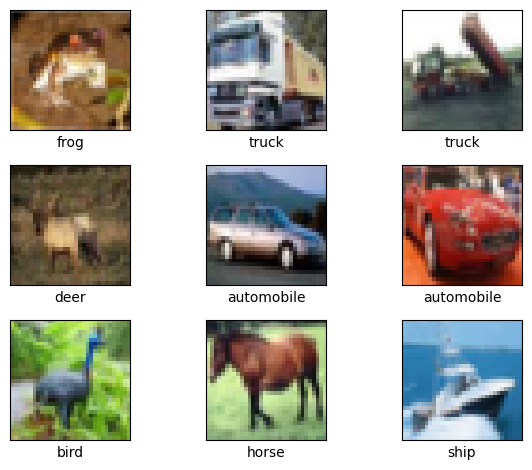

In [3]:

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.savefig('samples_grid.png', dpi=160)
plt.show()

In [4]:

def build_simple_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn = build_simple_cnn()
cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3616 - loss: 1.7191 - val_accuracy: 0.5394 - val_loss: 1.2776
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5932 - loss: 1.1471 - val_accuracy: 0.6286 - val_loss: 1.0876
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6608 - loss: 0.9630 - val_accuracy: 0.6792 - val_loss: 0.9135


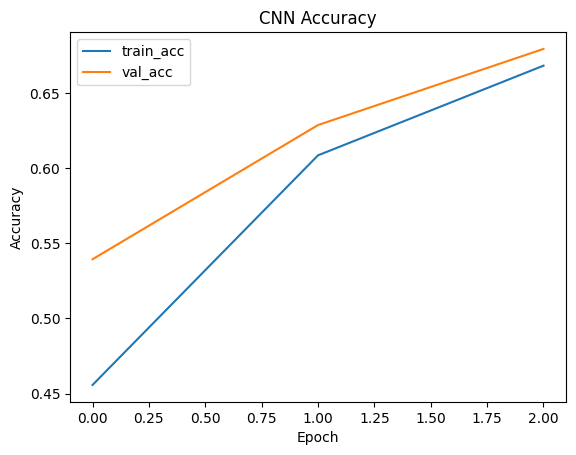

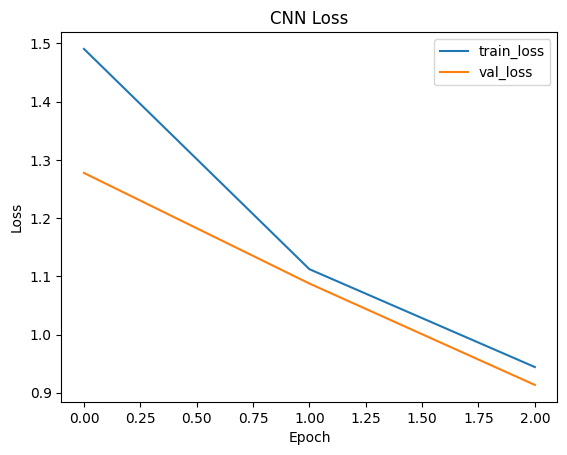

In [5]:

EPOCHS = 3 #@param {type:"slider", min:2, max:30, step:1}
BATCH_SIZE = 32 #@param {type:"slider", min:32, max:256, step:32}
history = cnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('CNN Accuracy')
plt.savefig('cnn_accuracy.png', dpi=160)
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('CNN Loss')
plt.savefig('cnn_loss.png', dpi=160)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.69      0.73      0.71      1000
  automobile       0.85      0.73      0.78      1000
        bird       0.61      0.53      0.56      1000
         cat       0.44      0.55      0.49      1000
        deer       0.71      0.51      0.59      1000
         dog       0.51      0.66      0.58      1000
        frog       0.83      0.68      0.75      1000
       horse       0.73      0.72      0.73      1000
        ship       0.80      0.79      0.80      1000
       truck       0.71      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



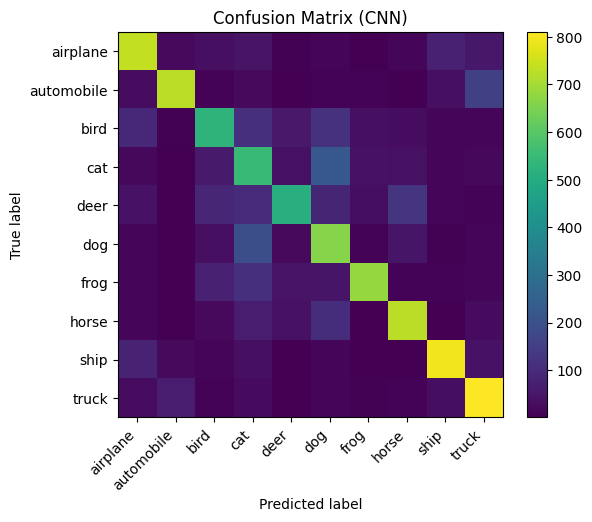

In [6]:
# Evaluate CNN + Confusion Matrix + Classification Report
y_pred = np.argmax(cnn.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix (CNN)')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label'); plt.xlabel('Predicted label')
plt.savefig('cnn_confusion_matrix.png', dpi=200, bbox_inches='tight')
plt.show()

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2711 - loss: 1.9625 - val_accuracy: 0.4720 - val_loss: 1.4414
Epoch 2/3
703/703 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.4528 - loss: 1.4983 - val_accuracy: 0.5068 - val_loss: 1.3869
Epoch 3/3
  1/703 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4375 - loss: 1.4330

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.4375 - loss: 1.4330 - val_accuracy: 0.4944 - val_loss: 1.4237


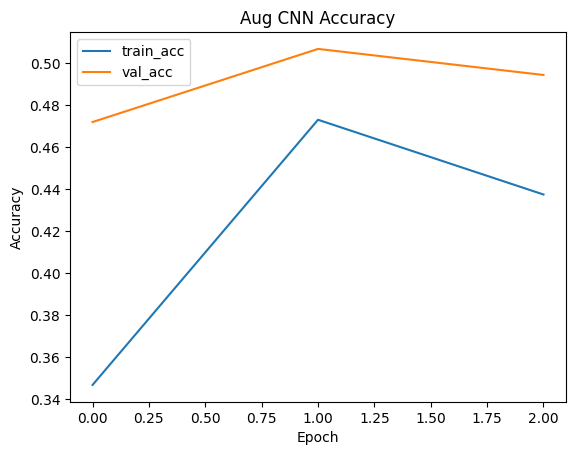

In [7]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

aug_cnn = build_simple_cnn()
steps = len(x_train)//64
aug_history = aug_cnn.fit(datagen.flow(x_train, y_train, batch_size=32),
                          validation_data=(x_val, y_val),
                          epochs=3,
                          steps_per_epoch=steps)

plt.figure()
plt.plot(aug_history.history['accuracy'], label='train_acc')
plt.plot(aug_history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Aug CNN Accuracy')
plt.savefig('aug_accuracy.png', dpi=160)
plt.show()

/tmp/ipython-input-944865007.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.1542 - loss: 2.2678 - val_accuracy: 0.2142 - val_loss: 2.0583
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.2441 - loss: 2.0220 - val_accuracy: 0.2828 - val_loss: 1.9294
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.2781 - loss: 1.9400 - val_accuracy: 0.2816 - val_loss: 1.9516
Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.2663 - loss: 2.0962 - val_accuracy: 0.0870 - val_loss: 2.3842
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4088 - loss: 1.6548 - val_accuracy: 0.1568 - val_loss: 2.1146


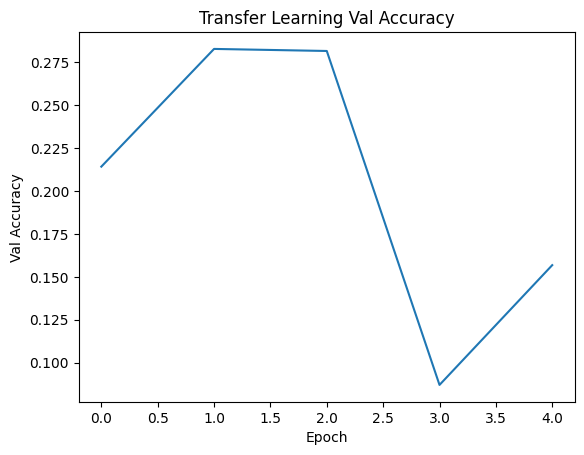

In [8]:
IMG_SIZE = 64
def upscale(images):
    return tf.image.resize(images, (IMG_SIZE, IMG_SIZE))

x_train_up = upscale(x_train).numpy()
x_val_up = upscale(x_val).numpy()
x_test_up = upscale(x_test).numpy()

base = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base.trainable = False  # freeze base

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)  # smaller dense layer
outputs = layers.Dense(10, activation='softmax')(x)
tl_model = tf.keras.Model(inputs, outputs)

tl_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Reduce batch size & epochs
tl_hist = tl_model.fit(
    x_train_up, y_train,
    validation_data=(x_val_up, y_val),
    epochs=3,        # was 5
    batch_size=32,   # was 64
    verbose=1
)

# Optional fine-tuning (keep very light)
base.trainable = True
for layer in base.layers[:-50]:  # freeze most layers
    layer.trainable = False

tl_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

ft_hist = tl_model.fit(
    x_train_up, y_train,
    validation_data=(x_val_up, y_val),
    epochs=2,       # was 3
    batch_size=32,
    verbose=1
)

# Plot
plt.figure()
plt.plot(tl_hist.history['val_accuracy'] + ft_hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.title('Transfer Learning Val Accuracy')
plt.savefig('tl_val_acc.png', dpi=160)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    airplane       0.48      0.02      0.05      1000
  automobile       0.16      0.88      0.27      1000
        bird       0.31      0.01      0.02      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.18      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.16      0.67      0.26      1000
        ship       0.55      0.04      0.08      1000
       truck       0.43      0.02      0.04      1000

    accuracy                           0.17     10000
   macro avg       0.23      0.17      0.07     10000
weighted avg       0.23      0.17      0.07     10000



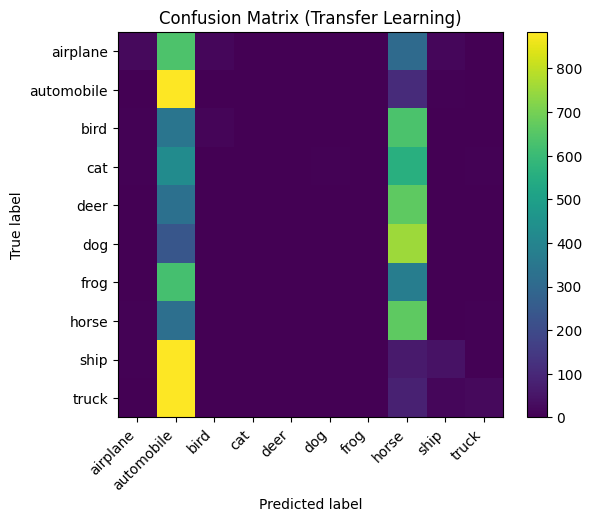

In [9]:
# Evaluate Transfer Learning Model
y_pred_tl = np.argmax(tl_model.predict(x_test_up), axis=1)
print(classification_report(y_test, y_pred_tl, target_names=class_names))
cm_tl = confusion_matrix(y_test, y_pred_tl)
plt.figure(figsize=(6,5))
plt.imshow(cm_tl, interpolation='nearest')
plt.title('Confusion Matrix (Transfer Learning)')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label'); plt.xlabel('Predicted label')
plt.savefig('tl_confusion_matrix.png', dpi=200, bbox_inches='tight')
plt.show()

# Save models
cnn.save('cnn_cifar10.h5')
aug_cnn.save('aug_cnn_cifar10.h5')
tl_model.save('mobilenetv2_cifar10.h5')

In [10]:

from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

def predict_image(img_path, model='cnn'):
    if model == 'cnn':
        model_obj = cnn
        img = tf.keras.utils.load_img(img_path, target_size=(32,32))
        arr = tf.keras.utils.img_to_array(img)/255.0
        arr = np.expand_dims(arr, axis=0)
        pred = np.argmax(model_obj.predict(arr), axis=1)[0]
        return class_names[pred]
    else:
        model_obj = tl_model
        img = tf.keras.utils.load_img(img_path, target_size=(64,64))
        arr = tf.keras.utils.img_to_array(img)
        arr = tf.keras.applications.mobilenet_v2.preprocess_input(arr)
        arr = np.expand_dims(arr, axis=0)
        pred = np.argmax(model_obj.predict(arr), axis=1)[0]
        return class_names[pred]

print('Upload an image for a quick demo .')
#try:
uploaded = files.upload()
for fname in uploaded.keys():
    print('Predicting with TL model:', fname, '->', predict_image(fname, model='tl'))
#except Exception as e:
    #print('Skip upload demo if not in Colab:', e)

Upload an image for a quick demo .


Saving test.png to test.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting with TL model: test.png -> automobile
